<a href="https://colab.research.google.com/github/masa512/harmonics_percussion/blob/main/harmonic_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import librosa
from librosa.feature import melspectrogram
from librosa.feature.inverse import mel_to_audio
from librosa.display import specshow
from IPython.display import Audio
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.io.wavfile import write


In [10]:
# Load a trumpet audio for a "G" - as stable as possible
w =  Audio('G.mp3', autoplay=True)

In [11]:
# Try playing
display(w)

In [18]:
# Load audio as array
data, fs = sf.read('G.mp3')
L = len(data)
print(f'Sampling rate: {fs} Hz')
print(f'Data length: {L}')

Sampling rate: 48000 Hz
Data length: 162432


Text(0, 0.5, 'Norm val')

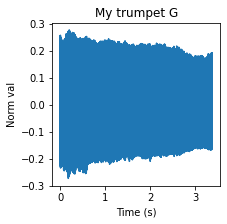

In [25]:
# Plot the audio in the time domain
f = plt.figure(figsize = (3,3))
Ts = 1/fs
t = Ts*np.arange(L)
plt.plot(t,data)
plt.title('My trumpet G')
plt.xlabel('Time (s)')
plt.ylabel('Norm val')

In [43]:
# Plot melspectrogram
fmax = 3000
mspec = melspectrogram(data,fs,fmax = fmax)
print(mspec.shape)

(128, 318)


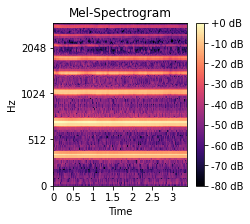

In [65]:
fig, ax = plt.subplots(figsize=(3,3))
S_dB = librosa.power_to_db(mspec, ref=np.max)
img = specshow(S_dB, x_axis='time', y_axis='mel', sr=fs, fmax=fmax, ax=ax)
ax.set_title('Mel-Spectrogram')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
mel_axes = ax.yaxis

The F_0 is located at 341.51 Hz


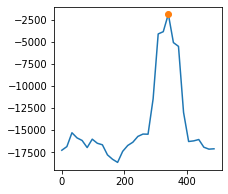

In [83]:
# Filtering process : Zero out the harmonics above Fs
mel_axis = librosa.mel_frequencies(fmax=fmax)

# Plot the time-averaged freq distribution
fig = plt.figure(figsize=(3,3))
plt.plot(mel_axis[mel_axis < 500],np.sum(S_dB,axis=1)[mel_axis < 500])
# Find the peak frequency value
i = np.argmax(np.sum(S_dB,axis=1)[mel_axis < 500])
plt.plot(mel_axis[i],np.sum(S_dB,axis=1)[i],'o')

F0 = (mel_axis[i])
F0_rnd = '%.2f'%(F0)
print(f'The F_0 is located at {F0_rnd} Hz')


[0]


Text(0.5, 1.0, 'Filtered Melspectrogram')

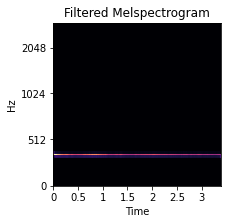

In [92]:
# Try LPF and remove all values greater than 500Hz lets say
lpf = 1*(mel_axis < 500).reshape(-1,1)
print(lpf[-1])

# Multiply with the melspectrogram
mspec_filt = mspec * lpf

# Plot the output
fig, ax = plt.subplots(figsize=(3,3))
img = specshow(mspec_filt, x_axis='time', y_axis='mel', sr=fs, fmax=fmax, ax=ax)
ax.set_title('Filtered Melspectrogram')

In [98]:
# Take inverse and plot the audio
data_filt = mel_to_audio(mspec_filt,sr=fs,length = L)

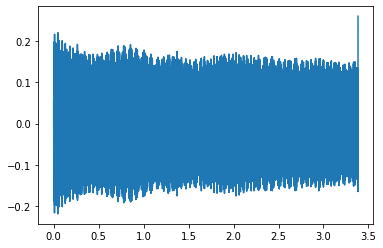

In [100]:
plt.plot(t,data_filt)

In [112]:
# Save audio
scaled = np.int16(data_filt / np.max(np.abs(data_filt)) * 32767)
write('G_F0.wav', fs, scaled)

In [113]:
w =  Audio('G_F0.wav', autoplay=True)
display(w)

NOW EXTRACT THE 2nd order 

The F_1 is located at 699.27 Hz


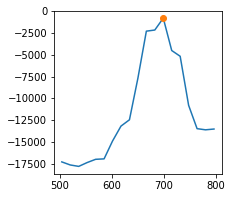

In [127]:
# Filtering process : Zero out the harmonics above Fs
mel_axis = librosa.mel_frequencies(fmax=fmax)

# Plot the time-averaged freq distribution
fig = plt.figure(figsize=(3,3))
plt.plot(mel_axis[(mel_axis > 500) & (mel_axis < 800)],np.sum(S_dB,axis=1)[(mel_axis > 500) & (mel_axis < 800)])

# Find the peak frequency value
i = np.argmax(np.sum(S_dB,axis=1)[(mel_axis > 500) & (mel_axis < 800)])

plt.plot(mel_axis[(mel_axis > 500) & (mel_axis < 800)][i],np.sum(S_dB,axis=1)[(mel_axis > 500) & (mel_axis < 800)][i],'o')

F1 = (mel_axis[(mel_axis > 500) & (mel_axis < 800)][i])
F1_rnd = '%.2f'%(F1)
print(f'The F_1 is located at {F1_rnd} Hz')


[0]


Text(0.5, 1.0, 'Filtered Melspectrogram')

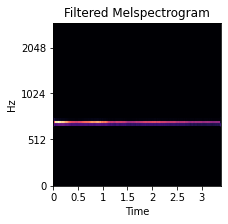

In [128]:
# Try LPF and remove all values greater than 500Hz lets say
lpf = 1*((mel_axis > 500) & (mel_axis < 800)).reshape(-1,1)
print(lpf[-1])

# Multiply with the melspectrogram
mspec_filt = mspec * lpf

# Plot the output
fig, ax = plt.subplots(figsize=(3,3))
img = specshow(mspec_filt, x_axis='time', y_axis='mel', sr=fs, fmax=fmax, ax=ax)
ax.set_title('Filtered Melspectrogram')

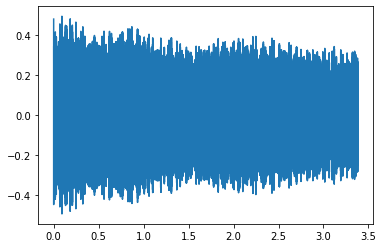

In [129]:
# Take inverse and plot the audio
data_filt = mel_to_audio(mspec_filt,sr=fs,length = L)
plt.plot(t,data_filt)

In [137]:
# Save audio
scaled = np.int16(data_filt / np.max(np.abs(data_filt)) * 32767)
write('G_F1.wav', fs, data_filt)

In [138]:
w =  Audio('/content/G_F1.wav', autoplay=True)
display(w)

In [134]:
w =  Audio('/content/G_F0.wav', autoplay=True)
display(w)

In [140]:
# Save original
data, fs = sf.read('G.mp3')
scaled = np.int16(data / np.max(np.abs(data)) * 32767)
write('G.wav', fs, scaled)
w =  Audio('/content/G.wav', autoplay=True)
display(w)

# Try the 